In [ ]:
%%html
<script>
(function() {
  // Create the toggle button
  const rtlButton = document.createElement("button");
  rtlButton.textContent = "Toggle LTR";
  rtlButton.id = "top-rtl-toggle";
  rtlButton.style.marginLeft = "8px";
  rtlButton.style.padding = "4px 10px";
  rtlButton.style.fontSize = "14px";
  rtlButton.style.cursor = "pointer";

  // State
  var rtlActive = false;

  // Styling function
  var applyStyleToEditor = (editor) => {
    if (!editor) return;
    var direction = getComputedStyle(editor).getPropertyValue('direction')=='rtl' ? 'ltr' : 'rtl';
    var text_align = getComputedStyle(editor).getPropertyValue('text-align')=='right' ? 'left' : 'right';
    editor.style.setProperty('direction', direction, 'important');
    editor.style.setProperty('text-align', text_align, 'important');
  };

  // Toggle logic
  rtlButton.onclick = () => {
    rtlActive = !rtlActive;
    rtlButton.textContent = rtlActive ? "Toggle LTR" : "Toggle RTL";
    document.querySelectorAll('.jp-MarkdownCell .jp-InputArea-editor').forEach(applyStyleToEditor);
    document.querySelectorAll('.jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span').forEach(applyStyleToEditor);
    document.querySelectorAll('jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon *').forEach(applyStyleToEditor);
  };

  // Watch for focus into editing Markdown cells
  // document.addEventListener('focusin', (event) => {
  //   const editor = event.target.closest('.jp-MarkdownCell .jp-InputArea-editor');
  //    if (editor) applyStyleToEditor(editor);
  // });

  // Insert into top toolbar if not already present
  var insertIntoToolbar = () => {
    const toolbar = document.querySelector('.jp-NotebookPanel-toolbar');
    if (toolbar && !document.getElementById("top-rtl-toggle")) {
      toolbar.appendChild(rtlButton);
    } else {
      // Try again in a moment if toolbar isn't ready yet
      setTimeout(insertIntoToolbar, 300);
    }
  };

  insertIntoToolbar();
})();
</script>

In [ ]:
%%html
<!-- <style>
  table {display: inline-block}
</style> -->

## דוגמה מסכמת (2): הערכת מונטה–קרלו של π
שיטת מונטה־קרלו היא משפחה של שיטות חישוב המבוססות על דגימה אקראית מרובה במטרה להעריך כמויות מתמטיות או פיזיקליות שקשה לחשב ישירות. במקום לפתור בעיה מורכבת בצורה אנליטית (כמו אינטגרל מסובך בממד גבוה), נבצע הרבה ניסויים אקראיים מבוקרים, נחשב את התוצאה בכל ניסוי, ונשתמש בממוצע של התוצאות כדי להתקרב לפתרון האמיתי.  

נשתמש בשיטה לחישוב $\pi$: נזרוק באקראי ($N$) נקודות אחידות בריבוע $([-1,1] \times [-1,1])$.  
החלק היחסי של הנקודות שנמצאות בתוך מעגל היחידה $(x^2 + y^2 \le 1)$ שווה בקירוב לשטח המעגל חלקי שטח הריבוע.  
שטח המעגל הוא $(\pi \cdot 1^2 = \pi)$, ושטח הריבוע הוא $(2 \cdot 2 = 4)$. לכן:

$$
\frac{\#\{(x,y): x^2+y^2 \le 1\}}{N} \;\approx\; \frac{\pi}{4}
\quad\Rightarrow\quad
\hat{\pi} \;=\; 4 \cdot \frac{\#\{\text{points in circle}\}}{N} \;=\; 4\bar{I}.
$$

```{note}
הנוסחא מתקבלת מתוך החלק היחסי של הנקודות שנפלו בתוך המעגל (מתוך סך $N$ הנקודות). המספר הזה מוכפל ב־4 משום ששטח הריבוע כולו גדול פי 4 משטח רבע המעגל.
```

ככל שמגדילים את $(N)$, ההערכה משתפרת והשגיאה הטיפוסית קטנה בערך כמו $(1/\sqrt{N})$ (כלומר פי 10 יותר דגימות → בערך פי $(\sqrt{10})$ פחות שגיאה).

`````{admonition}  מדוע השגיאה קטנה בערך כמו $1/\sqrt{N}$?  
:class: tip
   * כל נקודה שנזרקת היא ניסוי בינארי (נפלה בתוך המעגל או לא).  
   * ההסתברות לנפילה בתוך המעגל היא $p \approx \pi/4$.  
   * ממוצע $N$ ניסויים בינארים מתכנס לערך האמיתי $p$, אבל יש לו סטיית תקן של בערך

     $$
     \sigma_{\bar{I}} = \sqrt{\frac{p(1-p)}{N}}.
     $$

   * מכיוון שההערכה שלנו ל־$\pi$ היא $\hat{\pi} = 4 \bar{I}$, גם סטיית התקן מוכפלת פי 4:

     $$
     \sigma_{\hat{\pi}} \approx \frac{c}{\sqrt{N}}, \quad c = 4 \sqrt{p(1-p)}.
     $$
     
   * לכן ככל שמספר הנקודות $N$ גדול יותר, השגיאה הטיפוסית קטנה כמו $1/\sqrt{N}$.
`````

הסימולציה הבאה ממחישה את העקרון על רבע מעגל. שימו לב: ככל שנדגמות יותר נקודות, ההערכה ל$\pi$ מדויקת יותר והשגיאה קטנה בהתאם.


![Alt text](https://upload.wikimedia.org/wikipedia/commons/d/d4/Pi_monte_carlo_all.gif)

### פונקציית הערכה ל־π
הפונקציה דוגמת $N$ נקודות אחידות בריבוע, בודקת כמה מהן בתוך המעגל, ומחזירה את $\hat{\pi}$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Modern RNG for reproducibility
rng = np.random.default_rng(seed=123)

def mc_pi(N, seed=None):
    # Monte Carlo estimate of pi via hit-or-miss in unit disk
    r = np.random.default_rng(seed)
    xy = r.uniform(-1.0, 1.0, size=(N, 2))      # N points in the square [-1,1]^2
    inside = (xy[:, 0]**2 + xy[:, 1]**2) <= 1.0 # boolean mask: points inside the unit circle
    return 4.0 * inside.mean()                  # 4 * (fraction inside)


### כיצד משתנה הדיוק ביחס ל$N$?
נחשב את $\hat{\pi}$ עבור גדלים שונים של $N$, ונמדוד את השגיאה המוחלטת $|\hat{\pi} - \pi|$.


In [11]:
Ns = np.logspace(2, 6, num=9, base=10, dtype=int)  # from 1e2 to 1e6
est = np.array([mc_pi(int(N), seed=42) for N in Ns])
abs_err = np.abs(est - np.pi)

Ns[:5], est[:3], abs_err[:3]

(array([  100,   316,  1000,  3162, 10000]),
 array([3.28      , 3.12658228, 3.116     ]),
 array([0.13840735, 0.01501038, 0.02559265]))

### גרף 1: הערכה של $\pi$ כפונקציה של $N$

בגרף זה נציג את ההערכות $\hat{\pi}$ שמתקבלות מסימולציית מונטה–קרלו כפונקציה של מספר הדגימות $N$ (בסקאלה לוגריתמית), ונשווה אותן לערך האמיתי $\pi$ שמסומן בקו מקווקו.

כצפוי, עבור מספר קטן של דגימות $\hat{\pi}$ מתנדנד מאוד סביב הערך האמיתי. ככל ש־$N$ גדל, התוצאה מתייצבת ומתקרבת ל־$\pi$.

`````{admonition}  תחום אי־הוודאות התאורטי
:class: tip
נוכל לחשב בקירוב את סטיית התקן הצפויה:

- אם נסמן $p \approx \pi/4$, ההסתברות שנקודה אקראית תיפול בתוך המעגל.  
- ממוצע בינארי של $N$ ניסויים כאלה יש לו סטיית תקן:

  $$
  \sigma_{\bar{I}} = \sqrt{\frac{p(1-p)}{N}}.
  $$

- מאחר והערכתנו היא $\hat{\pi} = 4\bar{I}$, נקבל:

  $$
  \sigma_{\hat{\pi}} \approx \frac{c}{\sqrt{N}}, \quad c = 4\sqrt{p(1-p)} \approx 1.64.
  $$
  
`````

נשרטט סביב $\pi$ מרווח של $\pi \pm 2\sigma_{\hat{\pi}}$, שמייצג בקירוב רצועת ביטחון של 95%.  
אם רוב הנקודות $\hat{\pi}$ אכן נופלות בתוך הרצועה – סימן שההתנהגות של הסימולציה תואמת את התחזית התאורטית.

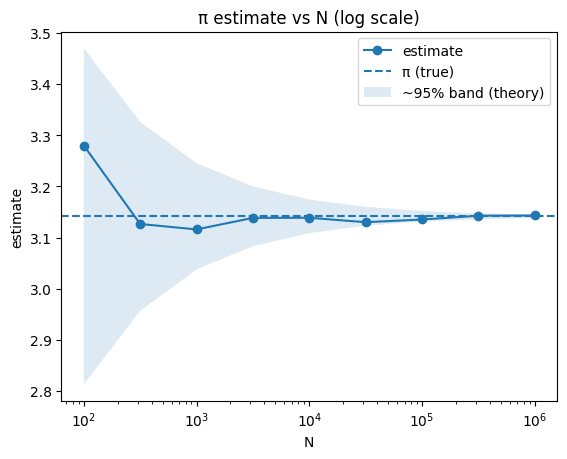

In [12]:
# Theoretical 1/sqrt(N) standard deviation band
p = np.pi / 4.0
c = 4.0 * np.sqrt(p * (1.0 - p))  # ~1.64
sigma = c / np.sqrt(Ns)

plt.figure()
plt.title("π estimate vs N (log scale)")
plt.plot(Ns, est, marker='o', label="estimate")
plt.axhline(np.pi, linestyle='--', label="π (true)")
# 95% band (approximately) around true π
plt.fill_between(Ns, np.pi - 2*sigma, np.pi + 2*sigma, alpha=0.15, label="~95% band (theory)")
plt.xscale('log')
plt.xlabel("N")
plt.ylabel("estimate")
plt.legend()
plt.show()


אנו רואים כי הגדלת מספר הדגימות $N$ גורמת להערכות $\hat{\pi}$ להיות קרובות יותר לערך האמיתי.

In [13]:
import json
from jupyterquiz import display_quiz

example = \
'''
[{
  "question": "בדוגמת מונטה–קרלו להערכת π אנו זורקים N נקודות אחידות בריבוע [-1,1]×[-1,1].<br><br>מהי הנוסחה להערכת π מתוך הניסוי?",
  "type": "many_choice",
  "answers": [
    {
      "answer": "π ≈ 4 * (מספר הנקודות בתוך המעגל / סך כל הנקודות)",
      "correct": true,
      "feedback": "נכון! שטח המעגל חלקי שטח הריבוע נותן את היחס, וכפול 4 משחזר את π"
    },
    {
      "answer": "π ≈ (מספר הנקודות מחוץ למעגל / סך כל הנקודות)",
      "correct": false,
      "feedback": "לא נכון — הנקודות שמחוץ למעגל אינן נותנות הערכה ישירה ל-π"
    },
    {
      "answer": "π ≈ (שטח הריבוע / שטח המעגל)",
      "correct": false,
      "feedback": "לא נכון — היחס הפוך: שטח המעגל חלקי שטח הריבוע קשור ל-π"
    },
    {
      "answer": "הערך תמיד שווה בדיוק ל-3.14 ללא תלות ב-N",
      "correct": false,
      "feedback": "לא נכון — ככל ש-N גדל ההערכה משתפרת, אבל היא לעולם אינה בדיוק 3.14"
    }
  ]
}]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

### גרף 2: השגיאה המוחלטת $(|\hat{\pi} - \pi|)$ לעומת $(N)$

נציג גרף לוג–לוג של השגיאה מול $(N)$, ונשווה לעקומה היחסית של־ $(1/\sqrt{N})$.  

`````{admonition} גרף לוג–לוג (log-log)
:class: tip
בגרף לוג–לוג שני הצירים (האופקי והאנכי) מוצגים בסקאלה לוגריתמית.  
במקום להציג ישירות את $N$ או את גודל השגיאה, מציגים את $\log(N)$ ואת $\log(\text{error})$.

יתרונות:
- קל לזהות קשרים מסוג חזקה: אם $\text{error} \sim 1/\sqrt{N}$,  
  אז $\log(\text{error}) \sim -\tfrac{1}{2} \log(N)$, כלומר קו ישר עם שיפוע $-0.5$.
- מאפשר לראות בבירור מגמות גם כשיש טווחים גדולים מאוד של ערכים (למשל מ־$10^2$ עד $10^6$).
`````

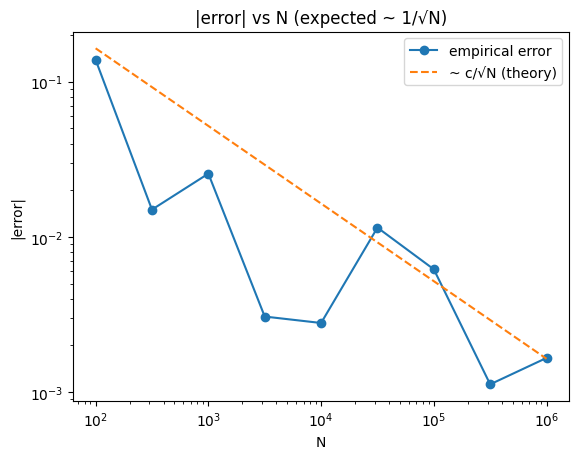

In [14]:
plt.figure()
plt.title("|error| vs N (expected ~ 1/√N)")
plt.loglog(Ns, abs_err, marker='o', label="empirical error")
plt.loglog(Ns, c/np.sqrt(Ns), linestyle='--', label="~ c/√N (theory)")
plt.xlabel("N")
plt.ylabel("|error|")
plt.legend()
plt.show()

### הסבר לגרף השגיאה בהערכת π

- **ציר X (אופקי)** – מספר הדגימות $N$, מוצג בסקאלה לוגריתמית.  
- **ציר Y (אנכי)** – גודל השגיאה המוחלטת $|\hat{\pi} - \pi|$, גם בסקאלה לוגריתמית.  

**הקו הכחול** – השגיאה שחושבה בפועל (ניסוי מונטה–קרלו).  
**הקו הכתום** – התחזית התאורטית: ירידה בקצב $1/\sqrt{N}$.  

- ככל ש־$N$ גדל, השגיאה קטנה ומתקרבת לקו התאורטי.  
- ההתנהגות מתאימה לחוק המספרים הגדולים: כדי לשפר את הדיוק פי 10 צריך בערך פי 100 יותר דגימות.  


In [16]:
import json
from jupyterquiz import display_quiz

example = \
'''
[{
  "question": "בדוגמת מונטה–קרלו להערכת π, ככל שמגדילים את N מספר הנקודות:<br><br>איך השגיאה הטיפוסית של ההערכה מתנהגת?",
  "type": "many_choice",
  "answers": [
    {
      "answer": "השגיאה קטנה בערך כמו 1/√N",
      "correct": true,
      "feedback": "נכון! זהו קצב ההתכנסות הסטנדרטי של ממוצע מקרי (חוק המספרים הגדולים וחוק השגיאות)"
    },
    {
      "answer": "השגיאה קטנה בערך כמו 1/N",
      "correct": false,
      "feedback": "לא נכון — זה היה קורה רק בשיטות דטרמיניסטיות מסוימות, לא במונטה–קרלו"
    },
    {
      "answer": "השגיאה לא תלויה ב-N, היא קבועה",
      "correct": false,
      "feedback": "לא נכון — ככל שמוסיפים עוד נקודות השגיאה יורדת"
    },
    {
      "answer": "השגיאה דווקא גדלה ככל ש-N גדל",
      "correct": false,
      "feedback": "לא נכון — היא קטנה, אחרת מונטה–קרלו לא היה עובד!"
    }
  ]
}]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

### סיכום
* ההערכה $(\hat{\pi} = 4 \cdot \text{(ratio of points in circle)})$ מתכנסת לערך האמיתי ככל ש־$N$ גדל.
* השגיאה הטיפוסית קטנה בערך כמו $1/\sqrt{N}$: כדי לחצות את השגיאה בחצי צריך בערך פי 4 יותר דגימות.
* שימוש ב־`default_rng` עם `seed` קבוע מאפשר **שחזור** של אותן תוצאות בכל הפעלה.
